<a href="https://colab.research.google.com/github/IagoPaiva19/Projeto-visualiza-o-de-Dados-/blob/main/Projeto_visu_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Iago de Paiva Gondim de Oliveira

RGM: 26111675

Instituição: Cruzeiro do Sul

Curso: Analise e Desenvolvimento de Sistemas

Link do Data Set: https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress




**Import das Bibliotecas** :

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

**Import da Data Set :**

In [ ]:
dados = pd.read_csv("vacinacao_covid.csv")

**Analisando as informações da CSV :**

In [ ]:
# Verificando as primeiras linhas do conjunto de dados
print(dados.head())

# Obtendo informações do conjunto de dados
print(dados.info())

# Realizando operações básicas de análise de dados
print(dados.describe())


**Primeiro plot:**

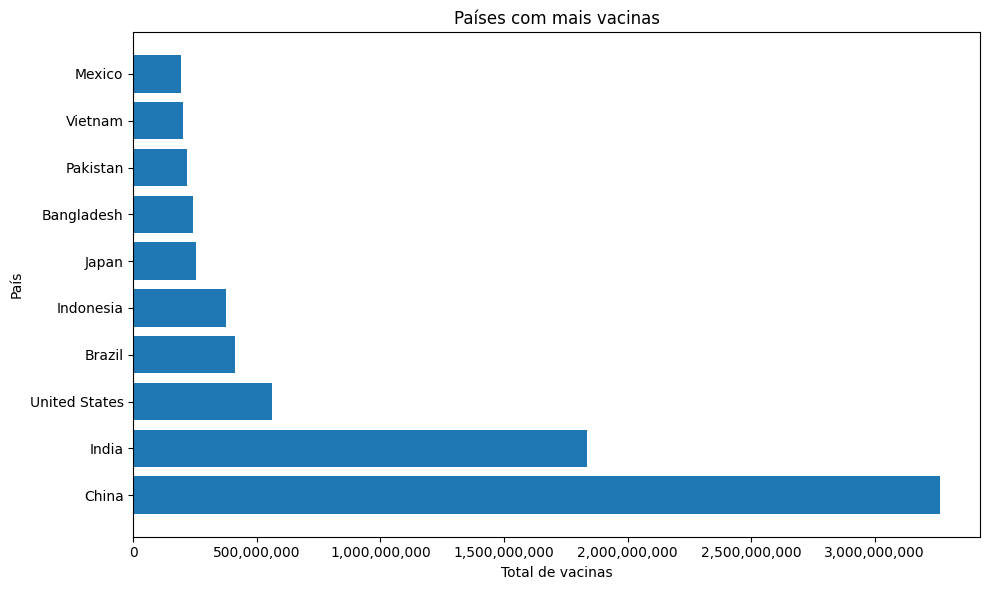

In [ ]:
plt.figure(figsize=(10, 6))
total_vaccinations_by_country = dados.groupby('country')['total_vaccinations'].max().sort_values(ascending=False)[:10]

plt.barh(total_vaccinations_by_country.index, total_vaccinations_by_country.values)
plt.xlabel('Total de vacinas')
plt.ylabel('País')
plt.title('Países com mais vacinas')

plt.gca().xaxis.set_major_formatter('{:,.0f}'.format)  # Valores formatados em inteiros

plt.tight_layout()
plt.show()



**Segundo plot:**

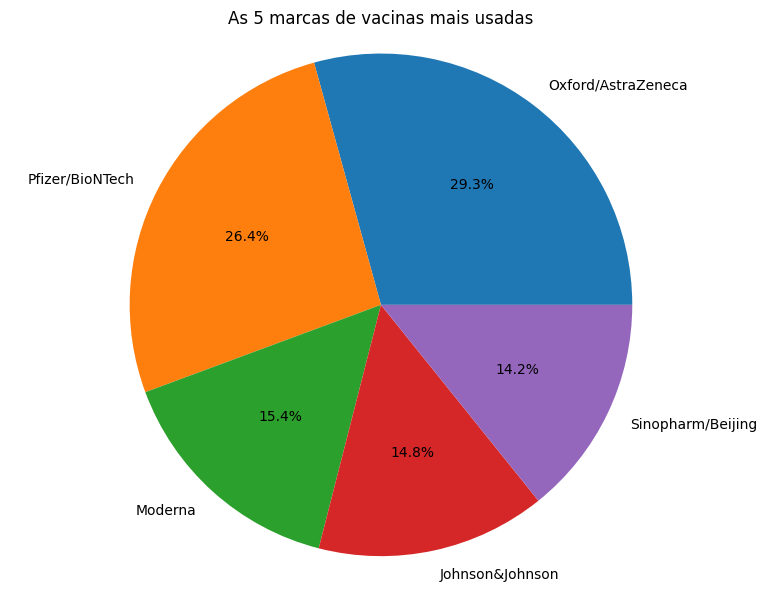

In [ ]:
plt.figure(figsize=(8, 6))
top_vaccine_brands = dados['vaccines'].str.split(', ').explode().value_counts()[:5]
plt.pie(top_vaccine_brands, labels=top_vaccine_brands.index, autopct='%1.1f%%')
plt.title('As 5 marcas de vacinas mais usadas')
plt.axis('equal')
plt.tight_layout()
plt.show()


**Terceiro Plot:**

In [ ]:
# Aplicando filtros com os dados de vacinas
vaccination_data = dados.groupby('country')['total_vaccinations'].max().reset_index()
vaccination_data = vaccination_data[vaccination_data['total_vaccinations'] > 0]

# Função para formatar o número de vacinas
def format_vaccinations(value):
    if value >= 1e9:
        return f'{int(value/1e9)} Bilhão(es)'
    elif value >= 1e6:
        return f'{int(value/1e6)} Milhão(es)'
    else:
        return f'{int(value/1e3)} Mil'

# Aplicar a formatação personalizada à coluna 'total_vaccinations'
vaccination_data['total_vaccinations_formatted'] = vaccination_data['total_vaccinations'].apply(format_vaccinations)

# Criar o gráfico de choropleth com tamanho/info personalizado
fig = px.choropleth(vaccination_data,
                    locations='country',
                    locationmode='country names',
                    color='total_vaccinations',
                    hover_name='country',
                    color_continuous_scale='YlGnBu',
                    title='Distribuição das Vacinações por País',
                    range_color=(0, vaccination_data['total_vaccinations'].max()),  # Definir limites mínimo e máximo da escala de cores
                    color_continuous_midpoint=vaccination_data['total_vaccinations'].mean(),  # Definir ponto médio da escala de cores
                    width=900,  # Definir largura do gráfico
                    height=500,  # Definir altura do gráfico
                    hover_data={'country': True, 'total_vaccinations_formatted': True},  # Exibir colunas 'country' e 'total_vaccinations_formatted' no rótulo de hover
                    labels={'country': 'País', 'total_vaccinations_formatted': 'Nº Vacinas'},  # Definir rótulos personalizados para 'country' e 'total_vaccinations_formatted'
                    template='plotly_white'  # Utilizar o tema de cores branco para o gráfico
                   )

# Formatar a exibição dos números em valor inteiro
fig.update_layout(coloraxis_colorbar=dict(
    tickformat=',',
    ticks='outside'
))

# Atualizar rótulo do eixo de cores
fig.update_layout(coloraxis_colorbar_title="Número de Vacinas Totais")

# Exibir o gráfico
fig.show()